Hello Guys My Name is Dhruv Aditya Mittal and I am a researcher in Data Analytics. In this notebook I will be developing a very simple Optical Character Reconition System using Deep Learning. The model provides descent accuracy on testing dataset. 

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
import string



Here UsedSentences.txt Contains the output of the text in the Image and the name of the Image. The name of the image is used to extract the image from the directory and add it to our dataset. Feel free to play with this piece of code and get more clearity of the dataset.

C:\Users\harsh\AppData\Local\Temp\ipykernel_6944\99415441.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((784,32), Image.ANTIALIAS)


No of Images : 1774
Characters :  abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,*&!@~():`^]¢‘;|-«
No of chars : 82


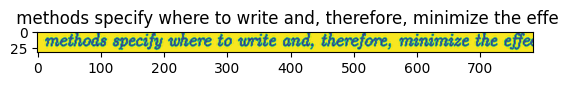

In [7]:
#Only Selecting the Images and excluding the directories in the folder
# images_names=fnmatch.filter(os.listdir('/kaggle/input/captcha-version-2-images/samples/'),'*.*')
from PIL import Image

text_file=open(r"UsedSentences.txt","r")

details=[]
outputs=[]
names=[]
for line in text_file:
    a=line.split('#')
    outputs.append(a[1].strip('\n'))
    details.append(a[0])

for detail in details:
    a=detail.split(' ')
    names.append(a[0])
X=[]

for name in names:
    img=Image.open('Encoder_Clean_Renamed/'+name+'.png','r')
    img = img.resize((784,32), Image.ANTIALIAS)
    img=np.asarray(img)
    img=img[:,:,0]
    X.append(img)

X=np.asarray(X)
plt.imshow(X[42])
plt.title(outputs[42])
print("No of Images :",X.shape[0])

symbols = " "+string.ascii_lowercase + string.ascii_uppercase+"0123456789.,*&!@~():`^]¢‘;|-«"
print("Characters :",symbols)
print("No of chars :",len(symbols))

# print(os.listdir('../input/linesdata/data/sentences/s01/'))


Here I have created a One Hot Encoded Array. 98 is taken as the maximum number of Character in the Sentences. If the letter is present in the output then it is encoded to 1.

In [8]:
Y=np.zeros(shape=(len(outputs),98,len(symbols)))
for example_no,name in enumerate(outputs):
    for letter_no,letter in enumerate(name):
        try:
            Y[example_no][letter_no][symbols.index(letter)]=1
        except:
            print(letter,end=" ")




Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã ‚ Â Ã ‚ Â Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ Ã â ‚ ¬ Ë œ 

Just Reshaping the Shape of X in order to pass it to the convolution.

In [9]:
X=np.reshape(X,(X.shape[0],X.shape[1],X.shape[2],1))
print("Shape of X is :",X.shape)

Shape of X is : (1774, 32, 784, 1)


In [10]:
# Neural Network Model 
# Try Removing Batch Normalisation and see how the performance decreases.
def OCRModel():
    image=keras.layers.Input((32,784,1))
    conv1=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(image)
    mp1=keras.layers.MaxPooling2D((2,2),padding='same')(conv1)
    conv2=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(mp1)
    mp2=keras.layers.MaxPooling2D((2,2),padding='same')(conv2)
    conv3=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(mp2)
    mp3=keras.layers.MaxPooling2D((2,2),padding='same')(conv3)
    conv4=keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(mp3)
    mp4=keras.layers.MaxPooling2D((2,1),padding='same')(conv4)
    conv5=keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(mp4)
    mp5=keras.layers.MaxPooling2D((2,1),padding='same')(conv5)
    conv6=keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(mp5)
    # mp6=keras.layers.MaxPooling2D((1,3),padding='same')(conv6)
    bn=keras.layers.BatchNormalization()(conv6)
    sq=keras.backend.squeeze(bn,axis=1)

    rn1=keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True))(sq)
    rn2=keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True))(rn1)

    exd=keras.backend.expand_dims(rn2,axis=2)
    maping=keras.layers.Conv2D(len(symbols),(2,2),activation='relu',padding='same')(exd)
    maping=keras.backend.squeeze(maping,axis=2)
    maping = tf.keras.layers.Softmax()(maping)

    # bn = keras.layers.BatchNormalization()(conv3)
    model=keras.Model(image,maping)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model


In [13]:
from keras.utils import plot_model
OCR=OCRModel()
OCR.fit(X,Y,epochs=5)
# plot_model(OCR, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/5
56/56 [==============================] - 359s 5s/step - loss: 1.6119
Epoch 2/5
56/56 [==============================] - 270s 5s/step - loss: 1.5030
Epoch 3/5
56/56 [==============================] - 265s 5s/step - loss: 1.4927
Epoch 4/5
56/56 [==============================] - 254s 5s/step - loss: 1.4766
Epoch 5/5
56/56 [==============================] - 255s 5s/step - loss: 1.4462


Decoding the Output of the Model and Comparing it.....

56/56 [==============================] - 117s 2s/step
98
predicted: T¢eeeTTTTTTTTTT

Orignal:  filter that replaces the pixel values with the neighb


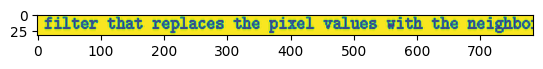

In [ ]:
xx=OCR.predict(X)
index=466
c=""
print(len(xx[0]))
for i in range(len(xx[0])):
    c=c+(symbols[np.argmax(xx[index][i])])
print("predicted:",c.strip())
print("\nOrignal:",outputs[index])
plt.imshow(X[index][:,:,0])

 Cheers....